# Import Libraries

In [1]:
# Importing Libraries
from textblob import TextBlob
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Import Data Files

In [2]:
txt_file = open('Key_Events_20th_Century.txt', encoding='utf-8')

In [3]:
# Import txt file
with open('Key_Events_20th_Century.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [4]:
# Creating Path
path = r'C:\Users\anush\20th_Century'

In [5]:
# Loading the twentieth-century data from the CSV file
countries_data = pd.read_csv(os.path.join(path, 'countries_list_20th_century_1.5.csv'), index_col = False)

# Displaying the first few rows to verify the content
countries_data.head()

,Unnamed: 0,country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola


In [6]:
# Dropping 'Unnamed: 0' Column
countries_data = countries_data.drop(columns=['Unnamed: 0'])
countries_data.head()

,country_name
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola


# Tokenize the words

In [7]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [8]:
# Sentence tokenization 
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonate Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1World at the beginning of the century1.1.1"The war to end all wars": World War I (1914â€“1918)1.1.2Russian Revolution and communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939â€“1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.

In [9]:
# Word tokenization
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1World', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2Russian', 'Revolution', 'and', 'communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 

In [10]:
# Create frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4815 samples and 20993 outcomes>


# create a bar chart to plot the 10 most common words

In [11]:
# Get the 10 most common words
top_10_words = dist_words.most_common(10)

In [12]:
top_10_words

[('.', 1275),
 ('the', 1099),
 (',', 963),
 ('of', 604),
 ('and', 398),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('The', 300),
 ('in', 291)]

In [13]:
# Convert to DataFrame for plotting
df_top_10 = pd.DataFrame(top_10_words, columns=["Word", "Frequency"])

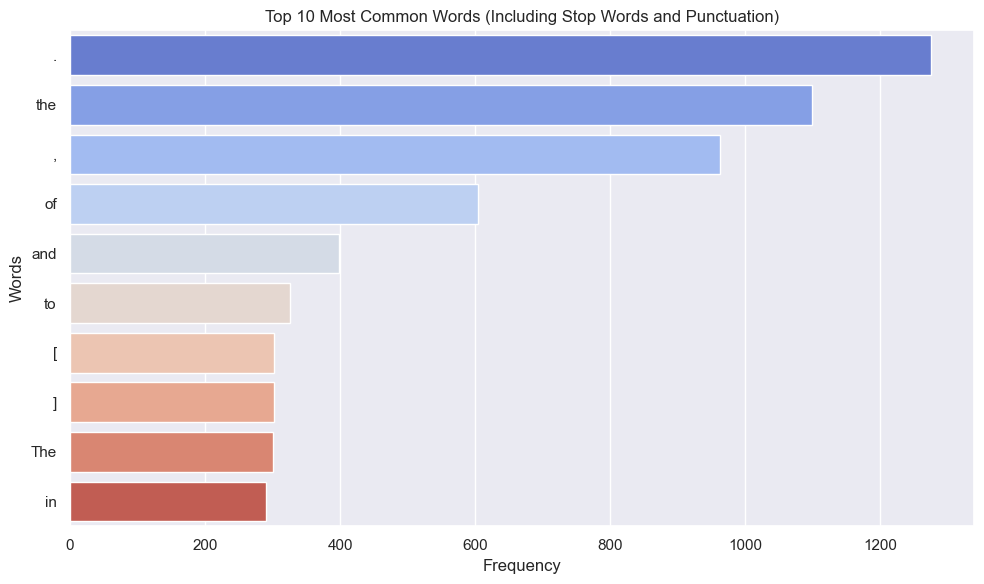

In [14]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="Word", data=df_top_10, palette="coolwarm")
plt.title("Top 10 Most Common Words (Including Stop Words and Punctuation)")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

# Remove stop words

In [15]:
from nltk.corpus import stopwords
import string
import re

In [16]:
# Define stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

In [17]:
# Remove stop words and punctuation
filtered_tokens = [word for word in tokenized_word if word.lower() not in stop_words and word not in punctuation]

# Recalculate frequency distribution
filtered_dist_words = FreqDist(filtered_tokens)

In [18]:
# Get the 10 most common words after filtering
top_10_filtered = filtered_dist_words.most_common(10)

# Convert to DataFrame for visualization
df_top_10_filtered = pd.DataFrame(top_10_filtered, columns=["Word", "Frequency"])

In [19]:
top_10_filtered

[("''", 279),
 ('``', 273),
 ('December', 222),
 ('Retrieved', 205),
 ('2018.^', 203),
 ('War', 123),
 ('war', 79),
 ('World', 77),
 ("'s", 71),
 ('Soviet', 55)]

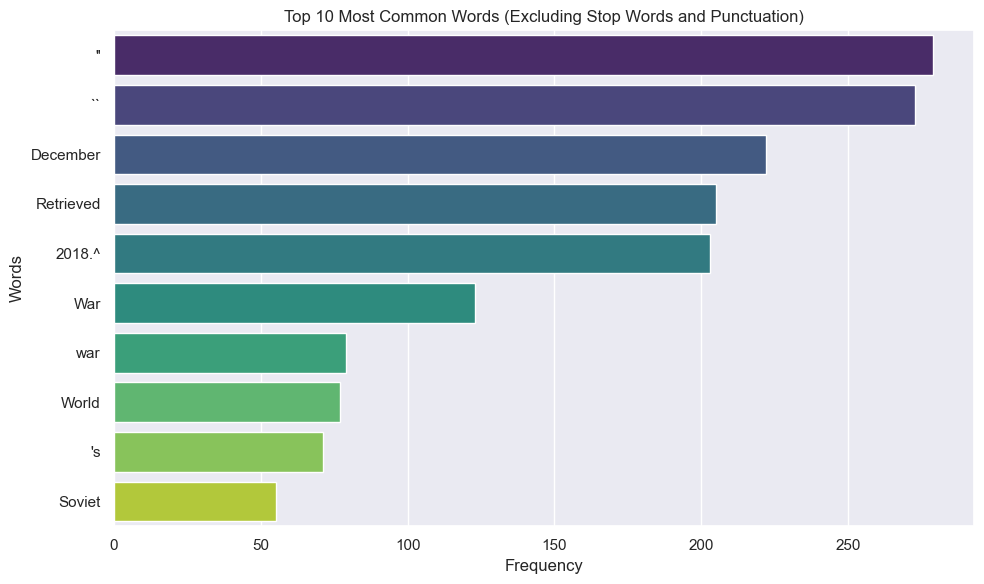

In [20]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="Word", data=df_top_10_filtered, palette="viridis")
plt.title("Top 10 Most Common Words (Excluding Stop Words and Punctuation)")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

### Comments on Changes After Removing Stop Words

1. **Focus on Meaningful Words**:
   - Before removal, common stop words (`the`, `of`, `and`) and punctuation (`.`, `,`, `[`, `]`) dominated the list.
   - After removal, content-rich words like "War," "World," and "Soviet" emerge, reflecting the text's themes.

2. **Citation Artifacts**:
   - Words like "Retrieved" and "December" indicate citation metadata, which might require additional cleaning.

3. **Improved Thematic Clarity**:
   - The updated list highlights key topics (e.g., war, historical events) and provides a clearer understanding of the text's focus.

# Create a tags list using TextBlob

In [21]:
# Create a TextBlob object from the tokenized words
text_blob = TextBlob(" ".join(filtered_dist_words))  # Join the filtered words into a single string

# Generate POS tags using TextBlob
tags_list = text_blob.tags

# Display the tags list
print(tags_list)

[('December', 'NNP'), ('Retrieved', 'VBD'), ('2018.^', 'CD'), ('War', 'NNP'), ('war', 'NN'), ('World', 'NNP'), ("'s", 'POS'), ('Soviet', 'JJ'), ('20', 'CD'), ('Hitler', 'NNP'), ('12', 'CD'), ('“', 'NNP'), ('Germany', 'NNP'), ('History', 'NNP'), ('11', 'CD'), ('13', 'CD'), ('2018', 'CD'), ('ISBNÂ', 'NNP'), ('first', 'JJ'), ('world', 'NN'), ('would', 'MD'), ('edit', 'VB'), ('Japan', 'NNP'), ('Germans', 'NNPS'), ('15', 'CD'), ('New', 'NNP'), ('Union', 'NNP'), ('Japanese', 'NNP'), ('II', 'NNP'), ('German', 'JJ'), ('United', 'NNP'), ('ISSNÂ', 'NNP'), ('September', 'NNP'), ('century', 'NN'), ('Europe', 'NNP'), ('also', 'RB'), ('became', 'VBD'), ('nuclear', 'JJ'), ('27', 'CD'), ('States', 'NNPS'), ('August', 'NNP'), ('June', 'NNP'), ('Battle', 'NNP'), ('July', 'NNP'), ('end', 'VBP'), ('18', 'CD'), ('attack', 'JJ'), ('new', 'JJ'), ('American', 'JJ'), ('weapons', 'NNS'), ('October', 'NNP'), ('Stalin', 'NNP'), ('Africa', 'NNP'), ('Holocaust', 'NNP'), ('May', 'NNP'), ('April', 'NNP'), ('North', '

# Create a list of the Top 10 POS tags for words

In [22]:
# Extract POS tags (second element in the tuple)
pos_tags = [tag[1] for tag in tags_list]

# Count the frequency of each POS tag
pos_counts = Counter(pos_tags)

In [23]:
# Get the 10 most common POS tags
top_10_pos = pos_counts.most_common(10)

In [24]:
top_10_pos

[('NNP', 1619),
 ('NN', 735),
 ('JJ', 524),
 ('CD', 517),
 ('NNS', 326),
 ('VBD', 264),
 ('VBG', 156),
 ('RB', 137),
 ('VBP', 90),
 ('VBN', 78)]

In [25]:
# Prepare the data for plotting
pos, frequencies = zip(*top_10_pos)

# Plot this list in a bar chart using the seaborn library

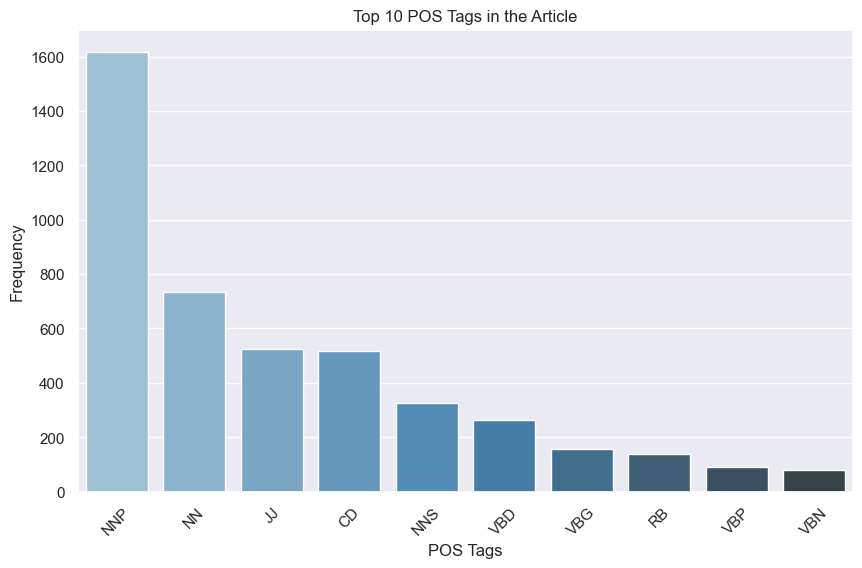

In [26]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(pos), y=list(frequencies), palette="Blues_d")
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('Top 10 POS Tags in the Article')
plt.xticks(rotation=45)
plt.show()

# Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives

In [27]:
# Convert tags_list into a DataFrame for easier processing
tags_df = pd.DataFrame(tags_list, columns=['Word', 'Word type'])

# Filter and count for Nouns (NN, NNS)
nouns_df = tags_df[(tags_df['Word type'] == "NN") | (tags_df['Word type'] == "NNS")]
nouns_count = nouns_df.groupby('Word').size().reset_index(name='Occurrences')
nouns_sorted = nouns_count.sort_values(by='Occurrences', ascending=False).head(15)

# Filter and count for Verbs (VB, VBD, VBG, VBN, VBP, VBZ)
verbs_df = tags_df[tags_df['Word type'].str.startswith("VB")]
verbs_count = verbs_df.groupby('Word').size().reset_index(name='Occurrences')
verbs_sorted = verbs_count.sort_values(by='Occurrences', ascending=False).head(15)

# Filter and count for Adjectives (JJ, JJR, JJS)
adjectives_df = tags_df[tags_df['Word type'].str.startswith("JJ")]
adjectives_count = adjectives_df.groupby('Word').size().reset_index(name='Occurrences')
adjectives_sorted = adjectives_count.sort_values(by='Occurrences', ascending=False).head(15)

In [28]:
nouns_sorted

,Word,Occurrences
858,site,2
0,0019-1035.^,1
704,populations,1
710,possibility,1
709,possessions,1
708,possession,1
707,position,1
706,portalRecent,1
705,port,1
703,popularity,1


In [29]:
verbs_sorted

,Word,Occurrences
0,..,1
448,postpone,1
430,overshadowed,1
431,overwhelmed,1
432,partitioned,1
433,passed,1
434,paving,1
435,payload,1
436,permitted,1
437,perpetrated,1


In [30]:
adjectives_sorted

,Word,Occurrences
0,.Text,1
354,negotiate,1
368,offensive1.3.10Final,1
367,offensive,1
366,occasional,1
365,numerous,1
364,nuclear,1
363,notorious,1
362,notable,1
361,northeastern,1


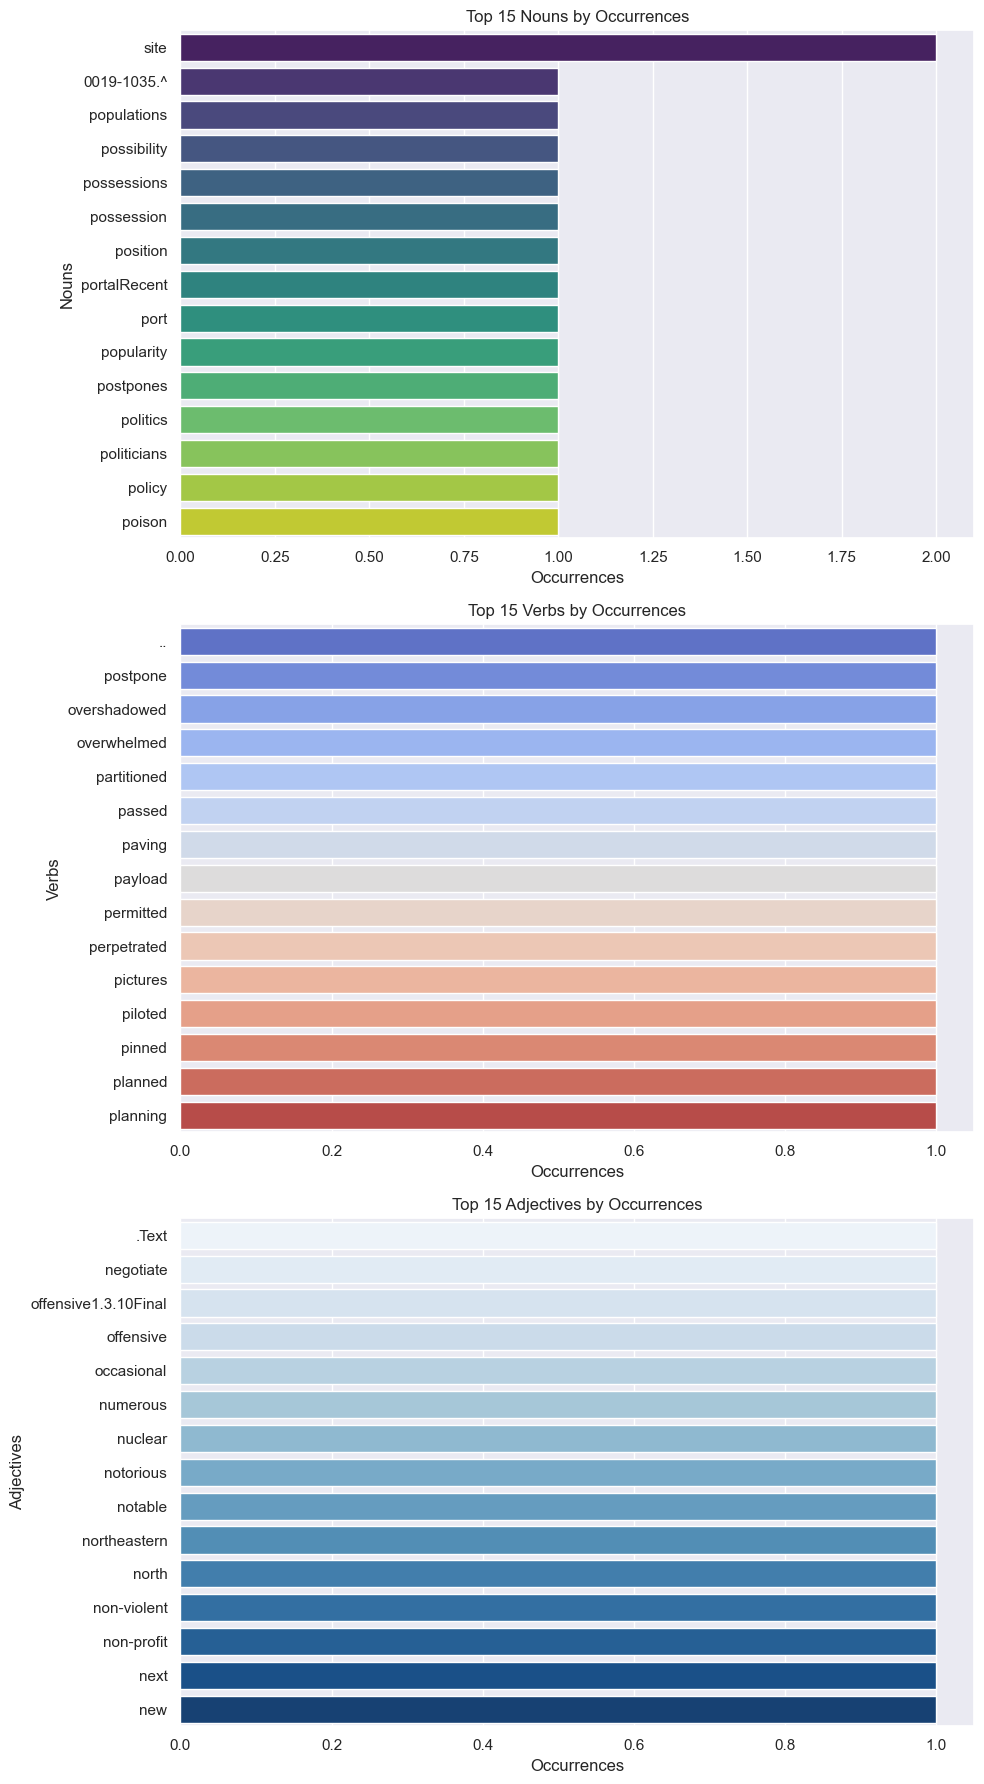

In [31]:
# Plotting the results
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot for Nouns
sns.barplot(x='Occurrences', y='Word', data=nouns_sorted, ax=axes[0], palette='viridis')
axes[0].set_title('Top 15 Nouns by Occurrences')
axes[0].set_xlabel('Occurrences')
axes[0].set_ylabel('Nouns')

# Plot for Verbs
sns.barplot(x='Occurrences', y='Word', data=verbs_sorted, ax=axes[1], palette='coolwarm')
axes[1].set_title('Top 15 Verbs by Occurrences')
axes[1].set_xlabel('Occurrences')
axes[1].set_ylabel('Verbs')

# Plot for Adjectives
sns.barplot(x='Occurrences', y='Word', data=adjectives_sorted, ax=axes[2], palette='Blues')
axes[2].set_title('Top 15 Adjectives by Occurrences')
axes[2].set_xlabel('Occurrences')
axes[2].set_ylabel('Adjectives')

plt.tight_layout()
plt.show()

### Analysis of POS Frequency

1. **Nouns**: "Site" stands out as the most frequent noun, indicating that locations or platforms might be central to the dataset's context. The presence of various other nouns suggests a wide array of topics, although some unusual or corrupted entries (e.g., "0019-1035.^") should be cleaned.

2. **Verbs**: The verbs show a mix of actions with no dominant themes, as they all appear only once. Some terms like "payload" and "pictures" seem misclassified as verbs, which could be a sign of the need for further refinement in part-of-speech tagging.

3. **Adjectives**: The adjectives appear mostly once, but words like "numerous" and "non-violent" hint at potential themes around quantity and social contexts. However, there are misclassifications, such as "negotiate," which should be a verb, and "offensive1.3.10Final," which may be a corrupted entry.

These insights suggest the need for better data cleaning and refinement of the part-of-speech tagging process to ensure accurate analysis.

# Create a dataframe with the countries and the number of times they’re mentioned

In [33]:
# Clean up the country names column and convert it to a list
countries_list = countries_data['country_name'].str.strip().str.lower().tolist()  # Convert 'country_name' column to lowercase list

# Convert the tokenized list into a single string
listToStr = ' '.join([str(elem).lower() for elem in filtered_dist_words])  # Join the list of words into a string and convert to lowercase

In [2]:
countries_list.head()

NameError: name 'countries_list' is not defined

In [34]:
# Clean the tokenized words from unwanted characters and count occurrences
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())  # Clean non-alphanumeric characters and split the text

In [50]:
# Replace specific country name aliases if necessary
country_mentions = {country: all_counts.get(country, 0) for country in countries_list}  # Ensure no KeyError if country is not found

In [51]:
# Convert the set to a list to allow slicing
filtered_dist_words_list = list(filtered_dist_words)

# Print the first 20 tokenized words
print(filtered_dist_words_list[:20])

["''", '``', 'December', 'Retrieved', '2018.^', 'War', 'war', 'World', "'s", 'Soviet', '20', 'Hitler', '12', '“', 'Germany', 'History', '11', '13', '2018', 'ISBNÂ']


In [52]:
# Convert the dictionary into a DataFrame for easier manipulation
df_countries = pd.DataFrame(list(country_mentions.items()), columns=["Country", "Times Mentioned"])

# Sort the DataFrame by the 'Times Mentioned' column in descending order
df_sorted_countries = df_countries.sort_values(by="Times Mentioned", ascending=False)

In [53]:
df_sorted_countries

,Country,Times Mentioned
69,guinea,3
132,pakistan,2
74,hungary,2
9,austria,2
0,afghanistan,1
...,...,...
84,jamaica,0
86,jordan,0
87,kazakhstan,0
89,kiribati,0


# Create a plot showing the frequency of the number of times these countries are mentioned

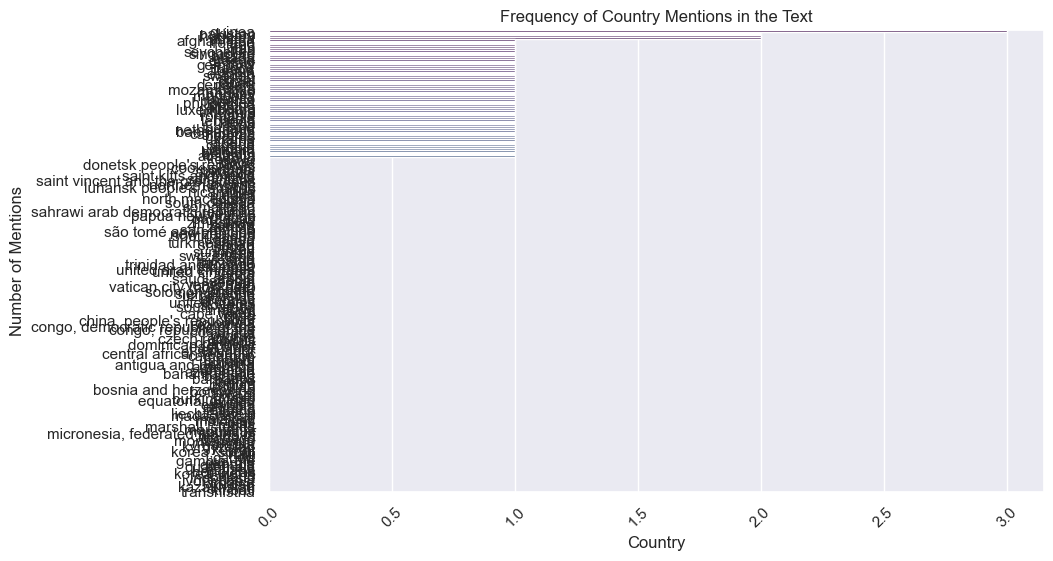

In [54]:
# Plot the frequency of the number of times countries are mentioned
plt.figure(figsize=(10, 6))
sns.barplot(x="Times Mentioned", y="Country", data=df_sorted_countries, palette="viridis")
plt.xticks(rotation=45)
plt.title('Frequency of Country Mentions in the Text')
plt.xlabel('Country')
plt.ylabel('Number of Mentions')
plt.show()

### for better visibility I am making the plot for top 30

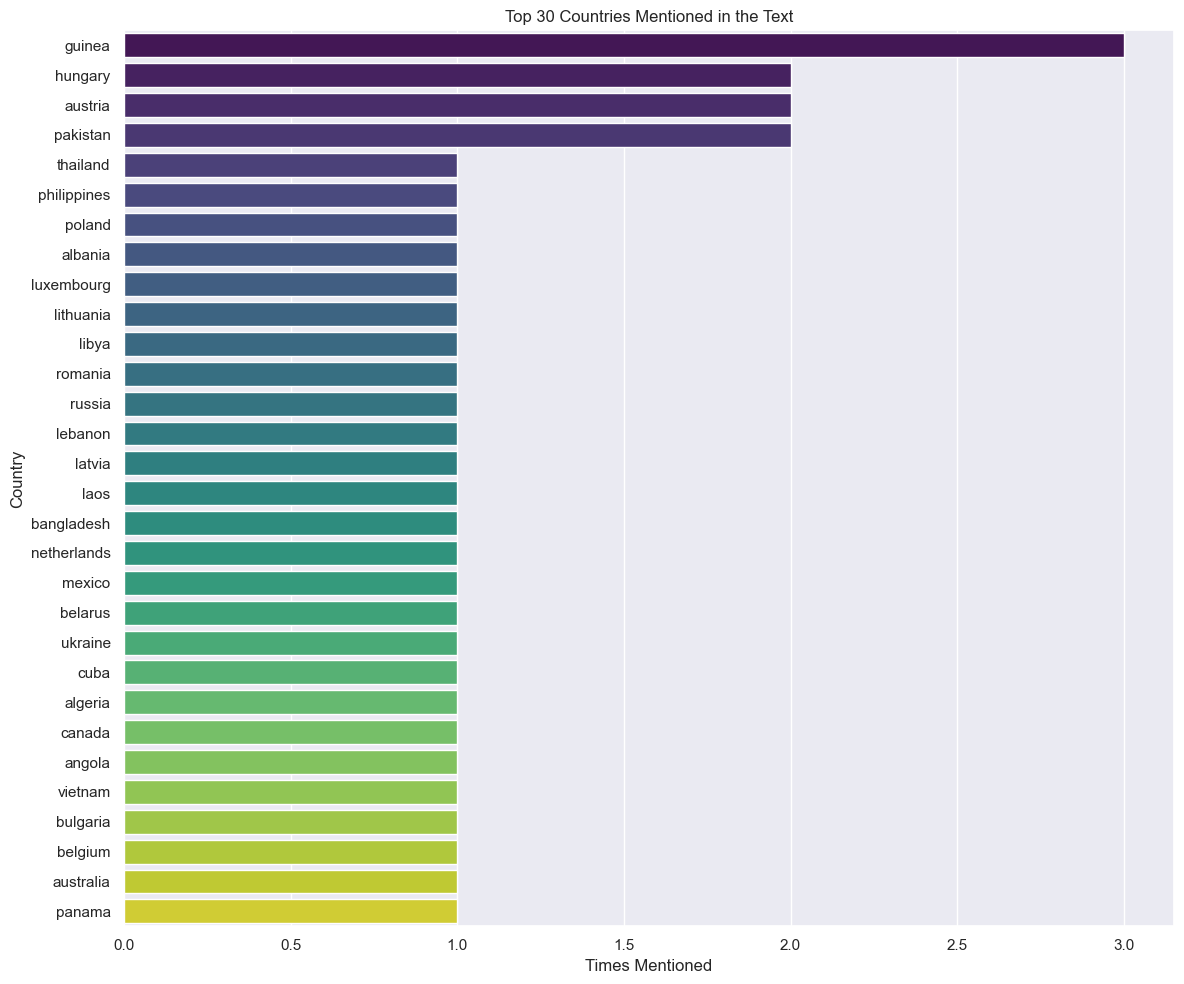

In [55]:
# Sort the DataFrame by "Times Mentioned" in descending order and select the top 30 countries
top_countries = df_sorted_countries.sort_values(by="Times Mentioned", ascending=False).head(30)

# Plot the frequency of mentions using a horizontal bar plot
plt.figure(figsize=(12, 10))  # Set the figure size
sns.barplot(x="Times Mentioned", y="Country", data=top_countries, palette="viridis")  # Create the bar plot

# Add plot labels and title
plt.title('Top 30 Countries Mentioned in the Text')  # Set the title of the plot
plt.xlabel('Times Mentioned')  # Label for the x-axis
plt.ylabel('Country')  # Label for the y-axis
plt.tight_layout()  # Adjust layout to avoid overlap

# Display the plot
plt.show()

In [56]:
top_countries

,Country,Times Mentioned
69,guinea,3
74,hungary,2
9,austria,2
132,pakistan,2
173,thailand,1
139,philippines,1
140,poland,1
1,albania,1
102,luxembourg,1
101,lithuania,1


### Findings from the Plot

1. **Low Mention Counts**: The top countries have relatively low mention counts, with the highest being only 3 mentions. This indicates a dispersed or broad focus on many countries rather than a concentrated focus on a few.

2. **Diverse Geographic Representation**: The countries mentioned range from different continents and regions, suggesting a globally diverse set of topics or references in the text.

3. **Sparse Data**: The majority of the 208 countries have either no mentions or very few, implying that the text may not have a strong emphasis on countries or international themes.

4. **Even Distribution Among Top Mentions**: Within the top 30, many countries have the same mention count (e.g., multiple countries with 1 or 2 mentions), highlighting a lack of dominance by any particular country in the text.

These findings could suggest that the text covers a wide range of international topics with no significant emphasis on any single country. The sparse and evenly distributed mentions may also indicate a general or superficial coverage of countries.

# Bonus Task: Sentiment Analysis

### Expectation:
I expect the polarity score to be between -0.5 and +0.5 for the majority of the historical events. Since these events are usually described in a factual or neutral tone, the sentiment should not lean too strongly in any direction. A score close to 0 is expected, indicating neutrality or balanced sentiment.

I expect the subjectivity score to be between 0 and 0.5, with some events having more subjective language depending on the personal interpretations or opinions included in the narrative. The subjectivity score should indicate moderate levels of personal viewpoint mixed with factual information, as is often the case with historical events.

In [57]:
text_sent = TextBlob(str(tokenized_sent))

In [58]:
print(text_sent.sentiment)

Sentiment(polarity=0.05533973606849814, subjectivity=0.3747840064915302)


### Sentiment Analysis Result:
The polarity score of 0.0553 is as expected, indicating a neutral sentiment. The subjectivity score of 0.3748 matches my prediction, showing moderate subjectivity in the description.

The results confirm that the event is described in a balanced, neutral tone with some personal interpretation, which aligns with my expectations.

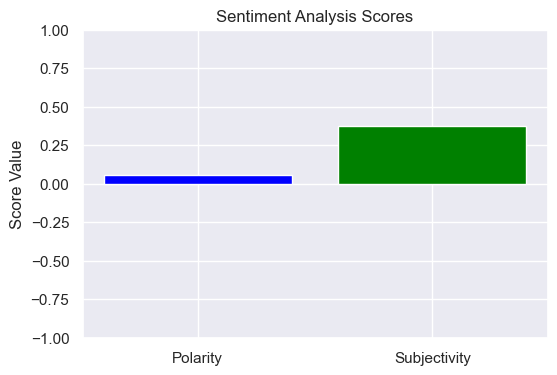

In [61]:
# Sentiment output for a single sentence
polarity = 0.05533973606849814
subjectivity = 0.3747840064915302

# Data for plotting
scores = [polarity, subjectivity]
labels = ['Polarity', 'Subjectivity']

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['blue', 'green'])
plt.title("Sentiment Analysis Scores")
plt.ylabel("Score Value")
plt.ylim(-1, 1)  # Setting y-axis to range from -1 to 1 for polarity and subjectivity

# Display the plot
plt.show()